In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('./dataGA.csv')

In [3]:
data = data.drop(columns = ['Severity'])

In [4]:
data_num = data.select_dtypes(include='number')

In [5]:
data_num.shape

(33129, 13)

In [6]:
data_num.describe([0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99])

,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),severity_binary
count,33129.000000,33129.000000,26374.000000,26374.000000,33129.000000,32458.000000,32199.000000,32446.000000,32517.000000,32395.000000,32253.000000,30881.000000,33129.000000
mean,33.520004,-84.035810,33.501639,-84.093192,1.264609,64.276049,63.518246,67.878691,29.199823,9.090500,6.020246,0.007980,0.198135
std,0.705067,0.862907,0.739350,0.805393,3.056481,16.082384,17.351230,22.583396,0.361445,2.293579,4.544288,0.052159,0.398600
min,30.638555,-85.546465,30.625347,-85.816145,0.000000,8.000000,-10.000000,9.000000,28.030000,0.000000,0.000000,0.000000,0.000000
1%,30.972873,-85.191203,30.909026,-85.206146,0.000000,27.000000,21.980000,22.000000,28.590000,0.500000,0.000000,0.000000,0.000000
5%,31.954515,-84.910616,31.794323,-84.924353,0.000000,36.000000,32.000000,29.000000,28.770000,3.000000,0.000000,0.000000,0.000000
10%,32.485473,-84.640657,32.404371,-84.690016,0.000000,43.000000,39.000000,36.000000,28.850000,6.000000,0.000000,0.000000,0.000000
25%,33.456360,-84.468914,33.436248,-84.475216,0.050000,52.000000,52.000000,49.000000,28.960000,10.000000,3.000000,0.000000,0.000000
50%,33.739838,-84.329881,33.743457,-84.341951,0.577000,66.000000,66.000000,70.000000,29.100000,10.000000,6.000000,0.000000,0.000000
75%,33.892227,-84.003686,33.894717,-84.047268,1.438000,76.000000,76.000000,89.000000,29.340000,10.000000,9.000000,0.000000,0.000000


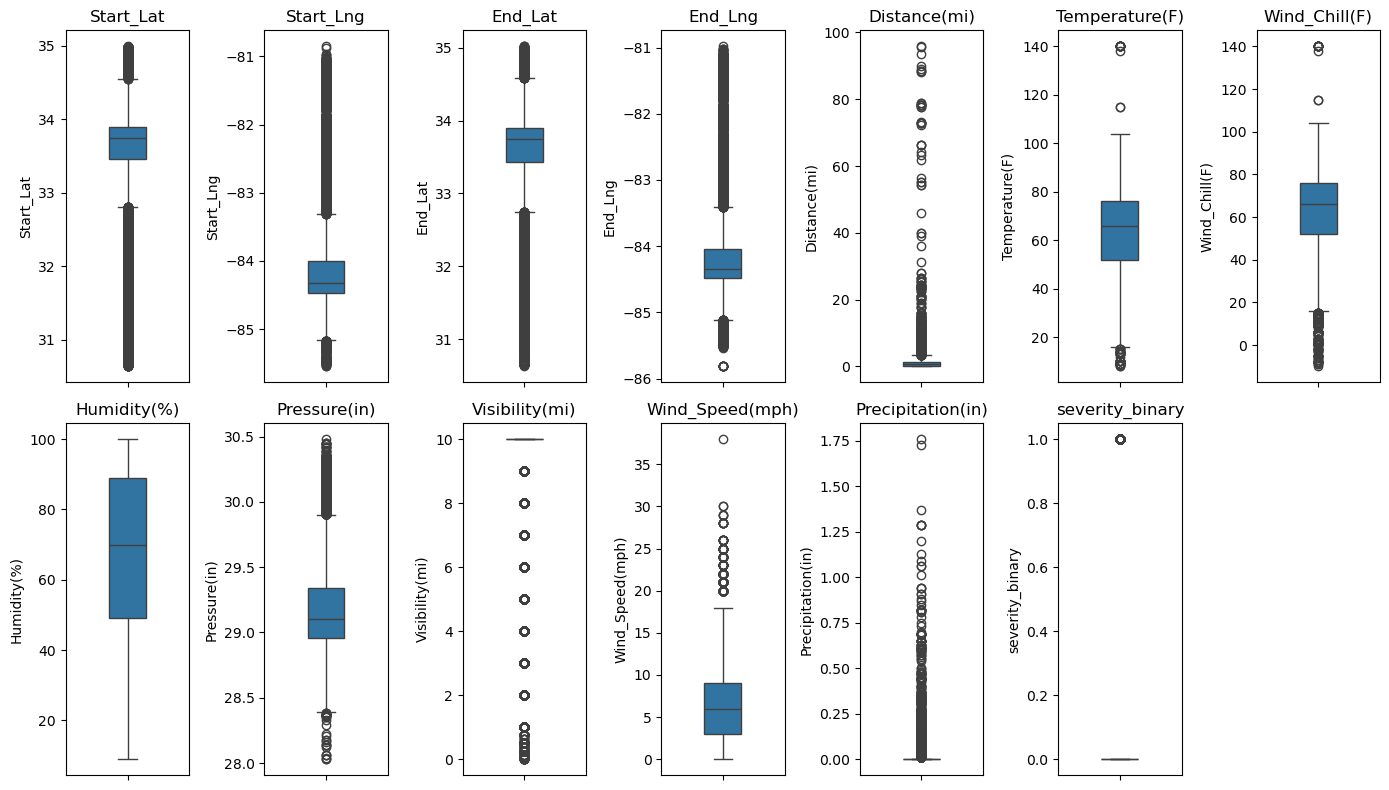

In [12]:
num_cols = len(data_num.columns)
rows = 2 
cols = (num_cols + 1) // 2

# Create subplots with 8 rows
fig, axes = plt.subplots(rows, cols, figsize=(cols * 2, rows * 4))

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, col in enumerate(data_num.columns):
    sns.boxplot(y=data_num[col], ax=axes[i], width = 0.3)
    axes[i].set_title(col,fontsize=12)
    
#remove empty charts if exists    
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig("boxplot.png", dpi=300, bbox_inches="tight")
plt.show()


In [8]:
#check missing
data.isna().sum()

ID                          0
Source                      0
Start_Time                  0
End_Time                    0
Start_Lat                   0
Start_Lng                   0
End_Lat                  6755
End_Lng                  6755
Distance(mi)                0
Description                 0
Street                    238
City                        0
County                      0
State                       0
Zipcode                     0
Country                     0
Timezone                    0
Airport_Code                8
Weather_Timestamp         594
Temperature(F)            671
Wind_Chill(F)             930
Humidity(%)               683
Pressure(in)              612
Visibility(mi)            734
Wind_Direction            876
Wind_Speed(mph)           876
Precipitation(in)        2248
Weather_Condition         661
Amenity                     0
Bump                        0
Crossing                    0
Give_Way                    0
Junction                    0
No_Exit   

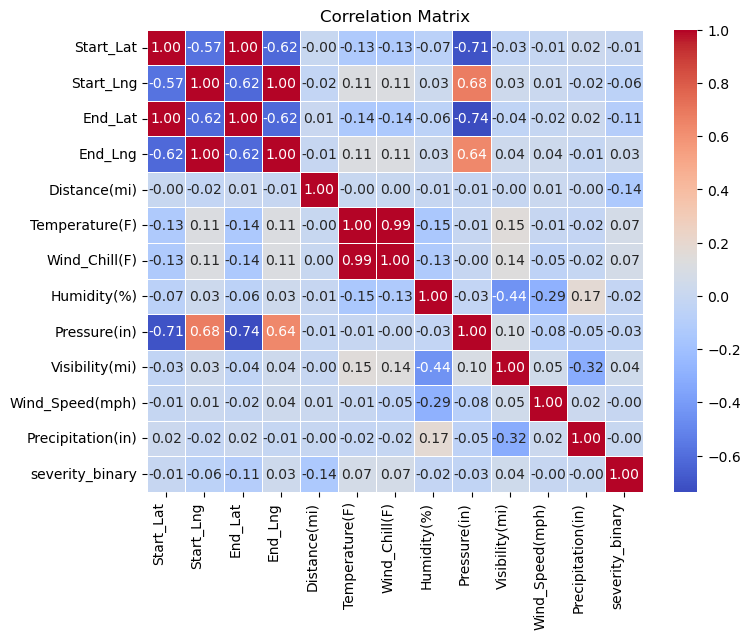

In [9]:
# Compute correlation matrix
corr_matrix = data_num.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.yticks(ha="right")
plt.xticks(ha="right")
plt.title("Correlation Matrix")
# plt.savefig("corr matrix.png", dpi = 300)
plt.show()

Decision: drop End_Lat, End_Lng and Wind_Chill(F)